Results for Connection:
Best n_neighbors: 3
Best ROC AUC: 0.9408602150537635
-


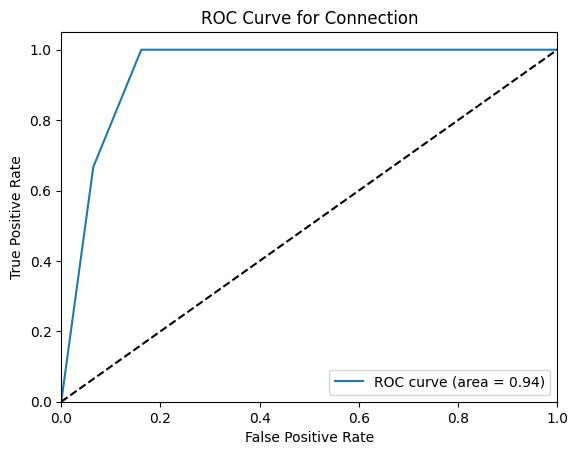

Results for Stress Management:
Best n_neighbors: 3
Best ROC AUC: 0.8857142857142857
-


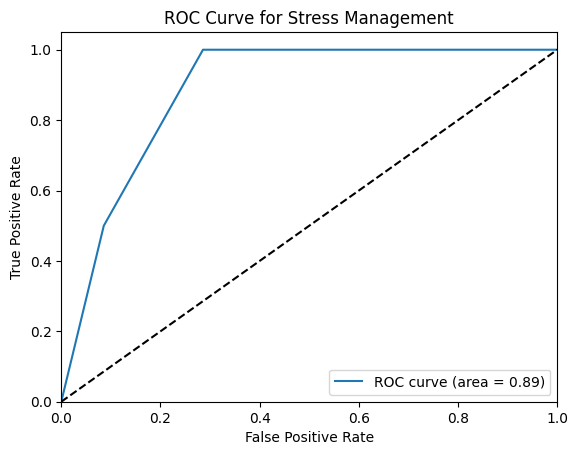

Results for Food:
Best n_neighbors: 6
Best ROC AUC: 0.989247311827957
-


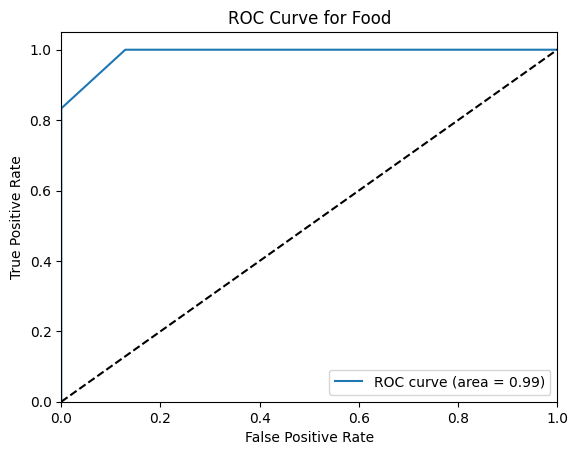

Results for Movement:
Best n_neighbors: 9
Best ROC AUC: 0.951048951048951
-


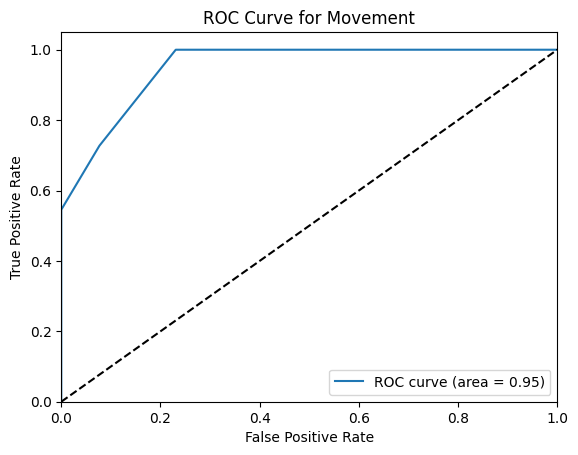

Results for Sleep:
Best n_neighbors: 3
Best ROC AUC: 0.990625
-


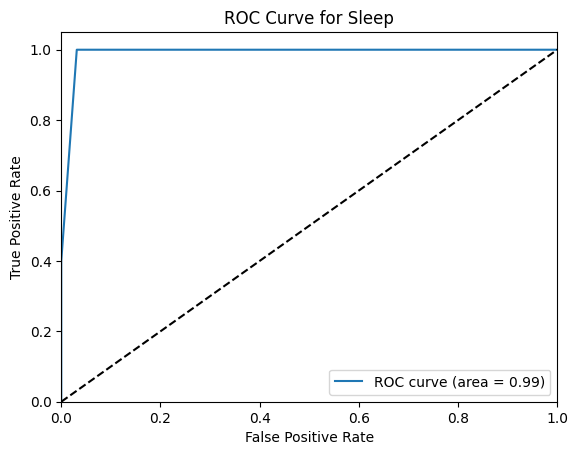

Final results for Connection:
Best n_neighbors: 3
Best ROC AUC: 0.9408602150537635
-
Final results for Stress Management:
Best n_neighbors: 3
Best ROC AUC: 0.8857142857142857
-
Final results for Food:
Best n_neighbors: 6
Best ROC AUC: 0.989247311827957
-
Final results for Movement:
Best n_neighbors: 9
Best ROC AUC: 0.951048951048951
-
Final results for Sleep:
Best n_neighbors: 3
Best ROC AUC: 0.990625
-


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

embeddings_file = 'sentencetransformer_embeddings2.tsv'
metadata_file = 'intentions_metadata.tsv'

embeddings_df = pd.read_csv(embeddings_file, sep='\t', header=None)
metadata_df = pd.read_csv(metadata_file, sep='\t')

X = embeddings_df.values

journeys = ['Connection', 'Stress Management', 'Food', 'Movement', 'Sleep']

def train_and_evaluate_knn(X, y, n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='cosine')
    neigh.fit(X_train, y_train)
    
    predictions = neigh.predict(X_test)
    probabilities = neigh.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)
    report = classification_report(y_test, predictions, zero_division=1)
    
    return accuracy, roc_auc, report, y_test, probabilities

results = {}
for journey in journeys:
    y = [1 if label == journey else 0 for label in metadata_df['journey_label']]
    
    best_auc = 0
    best_n_neighbors = 0
    for n in range(1, 11):
        accuracy, roc_auc, report, y_test, probabilities = train_and_evaluate_knn(X, y, n)
        if roc_auc > best_auc:
            best_auc = roc_auc
            best_n_neighbors = n
            best_report = report
            best_y_test = y_test
            best_probabilities = probabilities
    
    results[journey] = {
        'best_n_neighbors': best_n_neighbors,
        'best_auc': best_auc,
        'classification_report': best_report
    }
    
    print(f"Results for {journey}:")
    print(f"Best n_neighbors: {n_neighbors}")
    print(f"Best ROC AUC: {best_auc}")
    print("-")

    fpr, tpr, _ = roc_curve(best_y_test, best_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {best_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {journey}')
    plt.legend(loc="lower right")
    plt.show()

for journey, result in results.items():
    print(f"Final results for {journey}:")
    print(f"Best n_neighbors: {result['best_n_neighbors']}")
    print(f"Best ROC AUC: {result['best_auc']}")
    print("-")


1 0.7688172043010751
2 0.8629032258064517
3 0.9408602150537635
4 0.9193548387096774
5 0.9247311827956989
6 0.9193548387096774
7 0.9301075268817205
8 0.9301075268817205
9 0.9327956989247312
10 0.9301075268817205
11 0.935483870967742
12 0.9354838709677418
13 0.9354838709677418
14 0.9327956989247311
15 0.9381720430107526
16 0.9435483870967741
17 0.946236559139785
18 0.956989247311828
19 0.946236559139785
20 0.9381720430107526
21 0.9408602150537634
22 0.9354838709677419
23 0.9354838709677418
24 0.9381720430107527
25 0.9381720430107527
26 0.9354838709677419
27 0.9354838709677419
28 0.9354838709677419
29 0.9354838709677419
30 0.9381720430107527
31 0.9408602150537635
32 0.946236559139785
33 0.946236559139785
34 0.9435483870967741
35 0.9408602150537635
36 0.9435483870967741
37 0.9435483870967741
38 0.9435483870967741
39 0.9435483870967741
40 0.9435483870967741
41 0.9462365591397849
42 0.9462365591397849
43 0.9408602150537635
44 0.9408602150537635
45 0.9435483870967741
46 0.9435483870967741
47 

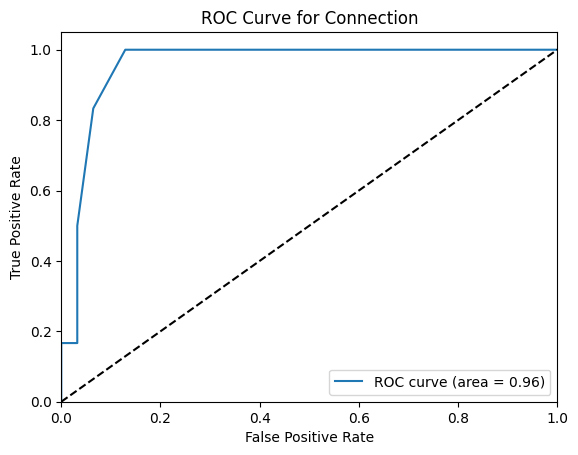

1 0.44285714285714284
2 0.8714285714285714
3 0.8857142857142857
4 0.8642857142857143
5 0.8285714285714286
6 0.8142857142857143
7 0.8142857142857143
8 0.7928571428571429
9 0.7857142857142857
10 0.7642857142857142
11 0.7571428571428571
12 0.75
13 0.7357142857142858
14 0.7285714285714285
15 0.7285714285714285
16 0.7214285714285714
17 0.7142857142857143
18 0.7142857142857143
19 0.7142857142857143
20 0.7571428571428571
21 0.7285714285714286
22 0.7142857142857143
23 0.7142857142857143
24 0.7
25 0.7000000000000001
26 0.6857142857142857
27 0.6785714285714286
28 0.6642857142857143
29 0.6571428571428571
30 0.6714285714285714
31 0.6571428571428571
32 0.6571428571428571
33 0.6357142857142858
34 0.6071428571428571
35 0.6571428571428571
36 0.6428571428571429
37 0.6357142857142857
38 0.6714285714285714
39 0.6785714285714286
40 0.6785714285714286
41 0.6714285714285715
42 0.6357142857142858
43 0.6214285714285714
44 0.6
45 0.5785714285714286
46 0.5642857142857143
47 0.5357142857142857
48 0.5428571428571

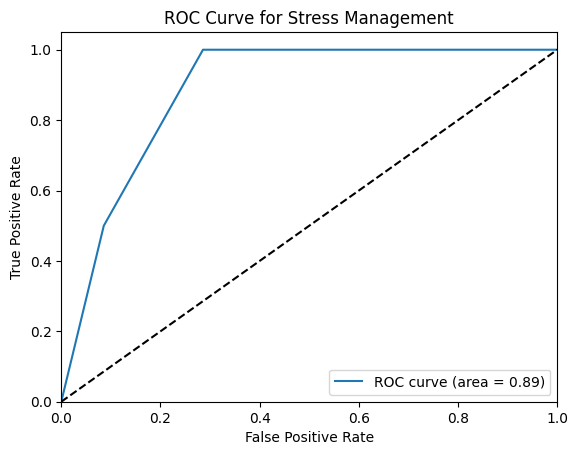

1 0.8682795698924731
2 0.9516129032258064
3 0.946236559139785
4 0.9838709677419355
5 0.9838709677419355
6 0.989247311827957
7 0.978494623655914
8 0.9838709677419355
9 0.9838709677419355
10 0.9811827956989247
11 0.9865591397849461
12 0.9838709677419355
13 0.978494623655914
14 0.9758064516129032
15 0.978494623655914
16 0.9811827956989247
17 0.9811827956989247
18 0.9811827956989246
19 0.9811827956989247
20 0.9811827956989246
21 0.9811827956989247
22 0.9811827956989247
23 0.9865591397849462
24 0.9811827956989247
25 0.9865591397849462
26 0.989247311827957
27 0.9838709677419355
28 0.978494623655914
29 0.9758064516129032
30 0.978494623655914
31 0.978494623655914
32 0.978494623655914
33 0.978494623655914
34 0.978494623655914
35 0.978494623655914
36 0.978494623655914
37 0.9758064516129031
38 0.9731182795698925
39 0.9731182795698925
40 0.9731182795698925
41 0.9731182795698925
42 0.9704301075268817
43 0.9704301075268817
44 0.9731182795698925
45 0.9731182795698925
46 0.9704301075268817
47 0.967741

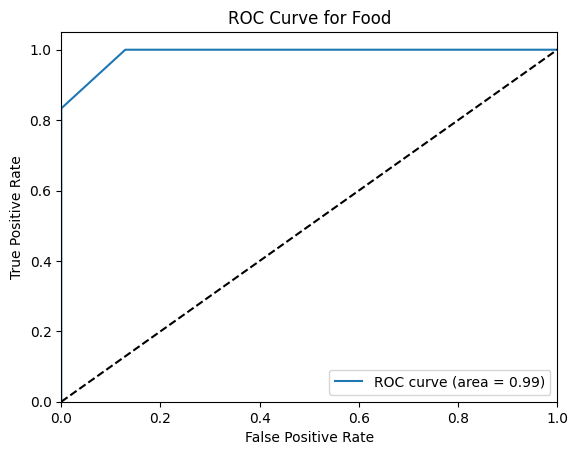

1 0.7080419580419581
2 0.7447552447552448
3 0.7902097902097902
4 0.7919580419580419
5 0.81993006993007
6 0.8741258741258743
7 0.916083916083916
8 0.9090909090909091
9 0.951048951048951
10 0.9493006993006994
11 0.951048951048951
12 0.9423076923076924
13 0.9475524475524476
14 0.9510489510489512
15 0.9545454545454546
16 0.9475524475524476
17 0.9370629370629371
18 0.9335664335664335
19 0.9353146853146853
20 0.9562937062937064
21 0.9545454545454546
22 0.9493006993006993
23 0.9527972027972028
24 0.9493006993006993
25 0.9475524475524475
26 0.9667832167832168
27 0.9650349650349651
28 0.9632867132867133
29 0.9597902097902097
30 0.9580419580419581
31 0.9510489510489512
32 0.9405594405594405
33 0.9562937062937062
34 0.9562937062937064
35 0.9493006993006993
36 0.9527972027972028
37 0.9562937062937062
38 0.9527972027972027
39 0.9475524475524476
40 0.9475524475524476
41 0.951048951048951
42 0.9475524475524476
43 0.9388111888111889
44 0.9353146853146853
45 0.9353146853146853
46 0.9335664335664335
47 

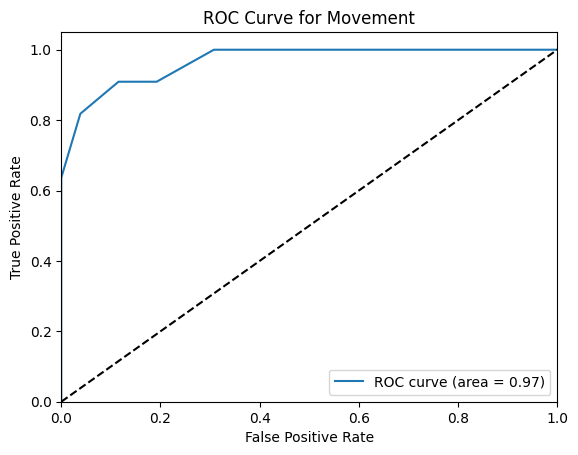

1 0.76875
2 0.953125
3 0.990625
4 0.990625
5 0.990625
6 0.990625
7 0.990625
8 0.990625
9 0.990625
10 0.990625
11 0.990625
12 0.990625
13 0.990625
14 0.990625
15 0.990625
16 0.990625
17 0.996875
18 0.996875
19 0.996875
20 0.996875
21 0.996875
22 0.996875
23 0.996875
24 0.996875
25 0.996875
26 0.996875
27 0.996875
28 0.996875
29 0.99375
30 0.996875
31 0.99375
32 0.996875
33 0.996875
34 0.99375
35 0.990625
36 0.996875
37 0.990625
38 0.990625
39 0.99375
40 0.990625
41 0.99375
42 0.9875
43 0.990625
44 0.990625
45 0.99375
46 0.984375
47 0.975
48 0.975
49 0.975
50 0.975
Results for Sleep:
Best n_neighbors: 17
Best ROC AUC: 0.996875
-


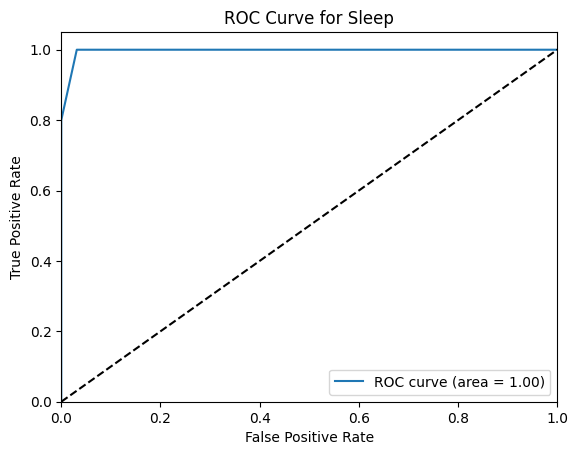

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

embeddings_file = 'sentencetransformer_embeddings2.tsv'
metadata_file = 'intentions_metadata.tsv'

embeddings_df = pd.read_csv(embeddings_file, sep='\t', header=None)
metadata_df = pd.read_csv(metadata_file, sep='\t')

X = embeddings_df.values

journeys = ['Connection', 'Stress Management', 'Food', 'Movement', 'Sleep']

def train_and_evaluate_knn(X, y, n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='cosine')
    neigh.fit(X_train, y_train)
    
    predictions = neigh.predict(X_test)
    probabilities = neigh.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)
    report = classification_report(y_test, predictions, zero_division=1)
    
    return accuracy, roc_auc, report, y_test, probabilities

results = {}
for journey in journeys:
    y = [1 if label == journey else 0 for label in metadata_df['journey_label']]
    
    best_auc = 0
    best_n_neighbors = 0
    for n in range(1, 51):
        accuracy, roc_auc, report, y_test, probabilities = train_and_evaluate_knn(X, y, n)
        if roc_auc > best_auc:
            best_auc = roc_auc
            best_n_neighbors = n
            best_report = report
            best_y_test = y_test
            best_probabilities = probabilities
        print(n, roc_auc)
    
    results[journey] = {
        'best_n_neighbors': best_n_neighbors,
        'best_auc': best_auc,
        'classification_report': best_report
    }
    
    print(f"Results for {journey}:")
    print(f"Best n_neighbors: {best_n_neighbors}")
    print(f"Best ROC AUC: {best_auc}")
    print("-")

    fpr, tpr, _ = roc_curve(best_y_test, best_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {best_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {journey}')
    plt.legend(loc="lower right")
    plt.show()

# Intention Classifier Project

project goal: intentions, map to journey areas
how to do embeddings, show code
training model, code for model, explain model
model validation, roc curve, why this mdoel is good
next steps/ results